In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler,Normalizer
import re


In [4]:
dataset=pd.read_csv('laptop_data.csv')
dataset.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
dataset.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
dataset.duplicated().sum()

np.int64(0)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [8]:
dataset.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
dataset.duplicated().sum()

np.int64(0)

C:\Users\moin2\AppData\Local\Temp\ipykernel_7128\983781003.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Price'])


<Axes: xlabel='Price', ylabel='Density'>

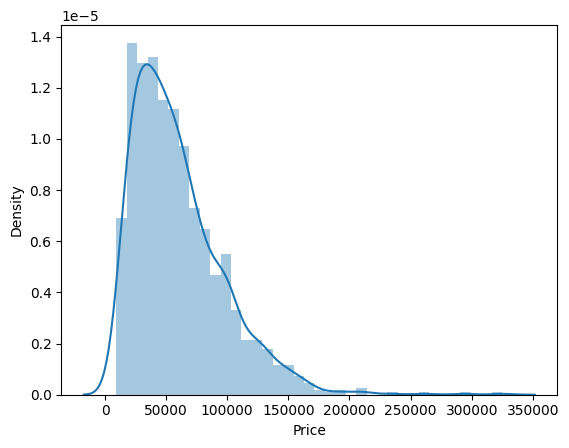

In [10]:
sns.distplot(dataset['Price'])

In [11]:
mean=dataset['Price'].mean()
std =dataset['Price'].std()

In [12]:
mean

np.float64(59870.042910207216)

In [13]:
std

np.float64(37243.20178619774)

In [14]:
dataset['Price_scaled'] = (dataset['Price']-mean)/std

In [15]:
dataset.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Price_scaled
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0.309013
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,-0.321522
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,-0.784950
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2.022525
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0.972681


C:\Users\moin2\AppData\Local\Temp\ipykernel_7128\2635804246.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Price_scaled'])


<Axes: xlabel='Price_scaled', ylabel='Density'>

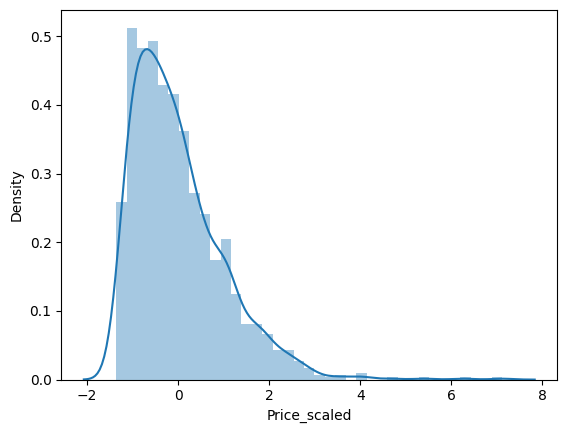

In [16]:
sns.distplot(dataset['Price_scaled'])

In [17]:
q1 = dataset['Price_scaled'].quantile(0.25)
q3 = dataset['Price_scaled'].quantile(0.75)
iqr = q3 - q1

In [18]:
round(iqr,2)

np.float64(1.27)

In [19]:
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5*iqr)
print(f'Lower_Bound is::{round(lower_bound,2)} and Upper_Bound is::{round(upper_bound,2)}')

Lower_Bound is::-2.66 and Upper_Bound is::2.43


In [20]:
dataset = dataset[(dataset['Price_scaled']>=lower_bound) & (dataset['Price_scaled']<=upper_bound)]

In [21]:
dataset.head(3)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Price_scaled
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0.309013
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,-0.321522
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,-0.784950


C:\Users\moin2\AppData\Local\Temp\ipykernel_7128\2635804246.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Price_scaled'])


<Axes: xlabel='Price_scaled', ylabel='Density'>

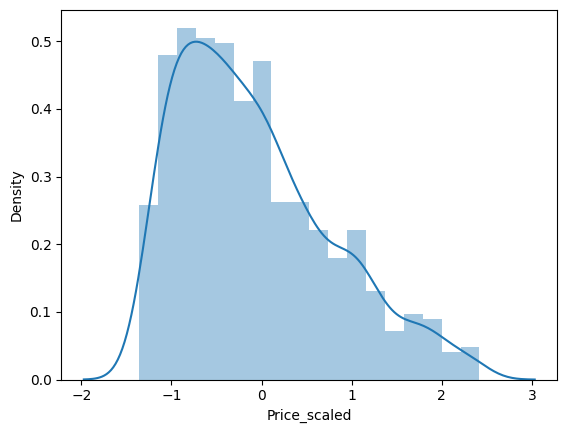

In [22]:
sns.distplot(dataset['Price_scaled'])

In [23]:
dataset["Price_scaled"].describe()

count    1274.000000
mean       -0.076649
std         0.853464
min        -1.358619
25%        -0.753273
50%        -0.244184
75%         0.433797
max         2.417798
Name: Price_scaled, dtype: float64

In [24]:
dataset.head(3)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Price_scaled
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0.309013
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,-0.321522
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,-0.784950


In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1274 non-null   int64  
 1   Company           1274 non-null   object 
 2   TypeName          1274 non-null   object 
 3   Inches            1274 non-null   float64
 4   ScreenResolution  1274 non-null   object 
 5   Cpu               1274 non-null   object 
 6   Ram               1274 non-null   object 
 7   Memory            1274 non-null   object 
 8   Gpu               1274 non-null   object 
 9   OpSys             1274 non-null   object 
 10  Weight            1274 non-null   object 
 11  Price             1274 non-null   float64
 12  Price_scaled      1274 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 139.3+ KB


In [26]:
dataset['Res_1']=dataset['ScreenResolution'].str.extract(r'(\d+)[^\d]+(\d+)')[0]
dataset['Res_2']=dataset['ScreenResolution'].str.extract(r'(\d+)[^\d]+(\d+)')[1]

In [27]:
dataset.head(3)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Price_scaled,Res_1,Res_2
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0.309013,2560,1600
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,-0.321522,1440,900
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,-0.784950,1920,1080


In [28]:
def categorize_display(text):
    if 'Retina' in text:
        return 1.92
    elif 'IPS' in text:
        return 1.31
    elif 'Touchscreen' in text:
        return 1.44
    elif 'Ultra' in text:
        return 3.27
    else:
        return 1
dataset['Screen_Weights'] = dataset['ScreenResolution'].apply(categorize_display)


In [29]:
dataset.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Price_scaled,Res_1,Res_2,Screen_Weights
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0.309013,2560,1600,1.92
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,-0.321522,1440,900,1.00
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,-0.784950,1920,1080,1.00
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2.022525,2880,1800,1.92
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0.972681,2560,1600,1.92


In [30]:
dataset = dataset.drop(columns={'ScreenResolution'})

In [31]:
dataset.head()

,Unnamed: 0,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Price_scaled,Res_1,Res_2,Screen_Weights
0,0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0.309013,2560,1600,1.92
1,1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,-0.321522,1440,900,1.00
2,2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,-0.784950,1920,1080,1.00
3,3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2.022525,2880,1800,1.92
4,4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0.972681,2560,1600,1.92


In [32]:
dataset['Res_1']=dataset['Res_1'].astype(int)
dataset['Res_2']=dataset['Res_2'].astype(int)

In [33]:
dataset['Screen_Weights'].unique()

array([1.92, 1.  , 1.31, 1.44, 3.27])

In [34]:
dataset['Price_scaled'].corr(other=dataset['Screen_Weights'],method='pearson')

np.float64(0.32013218636927193)

In [35]:
dataset['Price_scaled'].corr(other=dataset['Res_2'])

np.float64(0.42389784624117494)

In [36]:
dataset['Price_scaled'].corr(other=dataset['Inches'])

np.float64(-0.016701706639491776)

In [37]:
def Os_iputer(items):
    if items == "No OS":
        return 'Windows 10'
    else :
        return items 
dataset['OpSys']=dataset['OpSys'].apply(Os_iputer)

In [38]:
dataset.head()

,Unnamed: 0,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Price_scaled,Res_1,Res_2,Screen_Weights
0,0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0.309013,2560,1600,1.92
1,1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,-0.321522,1440,900,1.00
2,2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.86kg,30636.0000,-0.784950,1920,1080,1.00
3,3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2.022525,2880,1800,1.92
4,4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0.972681,2560,1600,1.92


In [39]:
dataset['Weight']=dataset['Weight'].str.split('kg',expand=True)[0]

In [40]:
dataset['Weight']=dataset['Weight'].astype(float)

In [41]:
dataset.head()

,Unnamed: 0,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Price_scaled,Res_1,Res_2,Screen_Weights
0,0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0.309013,2560,1600,1.92
1,1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,-0.321522,1440,900,1.00
2,2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.86,30636.0000,-0.784950,1920,1080,1.00
3,3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2.022525,2880,1800,1.92
4,4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0.972681,2560,1600,1.92


In [42]:
dataset['Price_scaled'].corr(other=dataset['Weight'])

np.float64(0.08044947647406303)

In [43]:
dataset['Ram']=dataset['Ram'].str.split('GB',expand=True)[0]

In [44]:
dataset['Ram']=dataset['Ram'].astype(float)

In [45]:
dataset.head()

,Unnamed: 0,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Price_scaled,Res_1,Res_2,Screen_Weights
0,0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0.309013,2560,1600,1.92
1,1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,-0.321522,1440,900,1.00
2,2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,Windows 10,1.86,30636.0000,-0.784950,1920,1080,1.00
3,3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2.022525,2880,1800,1.92
4,4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0.972681,2560,1600,1.92


In [46]:
round(dataset['Price_scaled'].corr(other=dataset['Ram']),3)

np.float64(0.714)

In [47]:
dataset["Clock_Speed"]=dataset['Cpu'].str.extract(r'(\d+\.\d+)GHz')[0]

In [48]:
dataset["Clock_Speed"]=dataset["Clock_Speed"].astype(float)

In [49]:
dataset.head()

,Unnamed: 0,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Price_scaled,Res_1,Res_2,Screen_Weights,Clock_Speed
0,0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0.309013,2560,1600,1.92,2.3
1,1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,-0.321522,1440,900,1.00,1.8
2,2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,Windows 10,1.86,30636.0000,-0.784950,1920,1080,1.00,2.5
3,3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2.022525,2880,1800,1.92,2.7
4,4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0.972681,2560,1600,1.92,3.1


In [50]:
round(dataset['Price_scaled'].corr(other=dataset['Clock_Speed']),3)

np.float64(0.435)

In [51]:
dataset['Cpu_gen']=dataset['Cpu'].str.extract(r'(i\d+)')

In [52]:
dataset.head()

,Unnamed: 0,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Price_scaled,Res_1,Res_2,Screen_Weights,Clock_Speed,Cpu_gen
0,0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0.309013,2560,1600,1.92,2.3,i5
1,1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,-0.321522,1440,900,1.00,1.8,i5
2,2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,Windows 10,1.86,30636.0000,-0.784950,1920,1080,1.00,2.5,i5
3,3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2.022525,2880,1800,1.92,2.7,i7
4,4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0.972681,2560,1600,1.92,3.1,i5


In [53]:
dataset['Cpu_gen']=dataset['Cpu_gen'].str.split('',expand=True)[2]

In [54]:
dataset['Cpu_gen'].fillna('0',inplace=True)

C:\Users\moin2\AppData\Local\Temp\ipykernel_7128\1365372295.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Cpu_gen'].fillna('0',inplace=True)


In [55]:
dataset['Cpu_gen']=dataset['Cpu_gen'].astype(int)

In [56]:
round(dataset['Price_scaled'].corr(other=dataset['Cpu_gen']),2)

np.float64(0.64)

In [57]:
dataset.head()

,Unnamed: 0,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Price_scaled,Res_1,Res_2,Screen_Weights,Clock_Speed,Cpu_gen
0,0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0.309013,2560,1600,1.92,2.3,5
1,1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,-0.321522,1440,900,1.00,1.8,5
2,2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,Windows 10,1.86,30636.0000,-0.784950,1920,1080,1.00,2.5,5
3,3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2.022525,2880,1800,1.92,2.7,7
4,4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0.972681,2560,1600,1.92,3.1,5


In [58]:
dataset['Cpu']=dataset['Cpu'].str.split(expand=True)[0]

In [59]:
dataset.head()

,Unnamed: 0,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Price_scaled,Res_1,Res_2,Screen_Weights,Clock_Speed,Cpu_gen
0,0,Apple,Ultrabook,13.3,Intel,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0.309013,2560,1600,1.92,2.3,5
1,1,Apple,Ultrabook,13.3,Intel,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,-0.321522,1440,900,1.00,1.8,5
2,2,HP,Notebook,15.6,Intel,8.0,256GB SSD,Intel HD Graphics 620,Windows 10,1.86,30636.0000,-0.784950,1920,1080,1.00,2.5,5
3,3,Apple,Ultrabook,15.4,Intel,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2.022525,2880,1800,1.92,2.7,7
4,4,Apple,Ultrabook,13.3,Intel,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0.972681,2560,1600,1.92,3.1,5


In [60]:
dataset['Cpu_gen'].value_counts()

Cpu_gen
7    502
5    423
0    213
3    136
Name: count, dtype: int64

In [61]:
dataset['Cpu'].value_counts()

Cpu
Intel      1211
AMD          62
Samsung       1
Name: count, dtype: int64

In [62]:
dataset['Memory_Space']=dataset['Memory'].str.extract(r'(\d+)')

In [63]:
dataset['Memory_Space']=dataset['Memory_Space'].astype(int)

In [64]:
dataset.head()

,Unnamed: 0,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Price_scaled,Res_1,Res_2,Screen_Weights,Clock_Speed,Cpu_gen,Memory_Space
0,0,Apple,Ultrabook,13.3,Intel,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0.309013,2560,1600,1.92,2.3,5,128
1,1,Apple,Ultrabook,13.3,Intel,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,-0.321522,1440,900,1.00,1.8,5,128
2,2,HP,Notebook,15.6,Intel,8.0,256GB SSD,Intel HD Graphics 620,Windows 10,1.86,30636.0000,-0.784950,1920,1080,1.00,2.5,5,256
3,3,Apple,Ultrabook,15.4,Intel,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2.022525,2880,1800,1.92,2.7,7,512
4,4,Apple,Ultrabook,13.3,Intel,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0.972681,2560,1600,1.92,3.1,5,256


In [65]:
dataset['Memory_Space'].value_counts()

Memory_Space
256    500
1      241
128    176
500    132
512    130
32      45
64      17
2       16
16      10
180      5
8        1
508      1
Name: count, dtype: int64

In [66]:
def Converter(value):
    if value == 1 :
        return value*1024
    elif value==2:
        return value*1024
    else :
        return value
dataset['Memory_Space']=dataset["Memory_Space"].apply(Converter)

In [67]:
dataset['Memory_Space'].value_counts()

Memory_Space
256     500
1024    241
128     176
500     132
512     130
32       45
64       17
2048     16
16       10
180       5
8         1
508       1
Name: count, dtype: int64

In [68]:
dataset.head()

,Unnamed: 0,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Price_scaled,Res_1,Res_2,Screen_Weights,Clock_Speed,Cpu_gen,Memory_Space
0,0,Apple,Ultrabook,13.3,Intel,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0.309013,2560,1600,1.92,2.3,5,128
1,1,Apple,Ultrabook,13.3,Intel,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,-0.321522,1440,900,1.00,1.8,5,128
2,2,HP,Notebook,15.6,Intel,8.0,256GB SSD,Intel HD Graphics 620,Windows 10,1.86,30636.0000,-0.784950,1920,1080,1.00,2.5,5,256
3,3,Apple,Ultrabook,15.4,Intel,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2.022525,2880,1800,1.92,2.7,7,512
4,4,Apple,Ultrabook,13.3,Intel,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0.972681,2560,1600,1.92,3.1,5,256


In [69]:
dataset['SSD_Status']=dataset['Memory'].str.contains('SSD')

In [70]:
dataset.head()

,Unnamed: 0,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Price_scaled,Res_1,Res_2,Screen_Weights,Clock_Speed,Cpu_gen,Memory_Space,SSD_Status
0,0,Apple,Ultrabook,13.3,Intel,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0.309013,2560,1600,1.92,2.3,5,128,True
1,1,Apple,Ultrabook,13.3,Intel,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,-0.321522,1440,900,1.00,1.8,5,128,False
2,2,HP,Notebook,15.6,Intel,8.0,256GB SSD,Intel HD Graphics 620,Windows 10,1.86,30636.0000,-0.784950,1920,1080,1.00,2.5,5,256,True
3,3,Apple,Ultrabook,15.4,Intel,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2.022525,2880,1800,1.92,2.7,7,512,True
4,4,Apple,Ultrabook,13.3,Intel,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0.972681,2560,1600,1.92,3.1,5,256,True


In [71]:
dataset['Memory'].value_counts()

Memory
256GB SSD                        407
1TB HDD                          222
500GB HDD                        132
512GB SSD                        113
128GB SSD +  1TB HDD              93
128GB SSD                         76
256GB SSD +  1TB HDD              70
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              10
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
1TB SSD                            8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
64GB SSD                           1
512GB SSD +  256GB SSD         

In [72]:
dataset['Memory_Space_hdd']=dataset['Memory'].str.extract(r'(  \d+TB HDD)')

In [73]:
dataset['Memory_Space_hdd'].value_counts()

Memory_Space_hdd
1TB HDD    175
2TB HDD     15
Name: count, dtype: int64

In [74]:
dataset['Memory_Space_hdd'].fillna('0',inplace=True) 

C:\Users\moin2\AppData\Local\Temp\ipykernel_7128\1462314731.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Memory_Space_hdd'].fillna('0',inplace=True)


In [75]:
dataset['Memory_Space_hdd'].value_counts()

Memory_Space_hdd
0            1084
  1TB HDD     175
  2TB HDD      15
Name: count, dtype: int64

In [76]:
dataset['Memory_Space_hdd']=dataset['Memory_Space_hdd'].str.extract(r'(\d+)')

In [77]:
dataset['Memory_Space_hdd']=dataset['Memory_Space_hdd'].astype(int)

In [78]:
dataset['Memory_Space_hdd']=dataset['Memory_Space_hdd']*1024

In [79]:
dataset['Memory_Space_hdd'].value_counts()

Memory_Space_hdd
0       1084
1024     175
2048      15
Name: count, dtype: int64

In [80]:
dataset['Memory_Extraa_SSD']=dataset['Memory'].str.extract(r'(  \d+GB SSD)')

In [81]:
dataset['Memory_Extraa_SSD'].value_counts()

Memory_Extraa_SSD
256GB SSD    3
512GB SSD    1
Name: count, dtype: int64

In [82]:
dataset['Memory_Extraa_SSD']=dataset['Memory_Extraa_SSD'].str.extract(r'(\d+)')

In [83]:
dataset['Memory_Extraa_SSD'].fillna('0',inplace=True)

C:\Users\moin2\AppData\Local\Temp\ipykernel_7128\3308068437.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Memory_Extraa_SSD'].fillna('0',inplace=True)


In [84]:
dataset['Memory_Extraa_SSD']=dataset['Memory_Extraa_SSD'].astype(int)

In [85]:
dataset['Memory_Extraa_SSD'].value_counts()

Memory_Extraa_SSD
0      1270
256       3
512       1
Name: count, dtype: int64

In [86]:
dataset.head()

,Unnamed: 0,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,Price_scaled,Res_1,Res_2,Screen_Weights,Clock_Speed,Cpu_gen,Memory_Space,SSD_Status,Memory_Space_hdd,Memory_Extraa_SSD
0,0,Apple,Ultrabook,13.3,Intel,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,0.309013,2560,1600,1.92,2.3,5,128,True,0,0
1,1,Apple,Ultrabook,13.3,Intel,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,-0.321522,1440,900,1.00,1.8,5,128,False,0,0
2,2,HP,Notebook,15.6,Intel,8.0,256GB SSD,Intel HD Graphics 620,Windows 10,1.86,...,-0.784950,1920,1080,1.00,2.5,5,256,True,0,0
3,3,Apple,Ultrabook,15.4,Intel,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,...,2.022525,2880,1800,1.92,2.7,7,512,True,0,0
4,4,Apple,Ultrabook,13.3,Intel,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,0.972681,2560,1600,1.92,3.1,5,256,True,0,0


In [87]:
dataset['Memory_Space']=dataset['Memory_Space']+dataset['Memory_Space_hdd']+dataset['Memory_Extraa_SSD']

In [88]:
dataset['Memory_Space'].value_counts()

Memory_Space
256     418
1024    241
500     132
512     117
1152     93
128      81
1280     70
32       45
2048     17
64       16
2304     10
1536     10
16       10
180       5
2560      3
2176      2
768       1
1088      1
8         1
508       1
Name: count, dtype: int64

In [89]:
dataset.drop(columns={'Memory_Space_hdd','Memory_Extraa_SSD','Memory'},inplace=True)

In [90]:
dataset.head()

,Unnamed: 0,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,Price_scaled,Res_1,Res_2,Screen_Weights,Clock_Speed,Cpu_gen,Memory_Space,SSD_Status
0,0,Apple,Ultrabook,13.3,Intel,8.0,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0.309013,2560,1600,1.92,2.3,5,128,True
1,1,Apple,Ultrabook,13.3,Intel,8.0,Intel HD Graphics 6000,macOS,1.34,47895.5232,-0.321522,1440,900,1.00,1.8,5,128,False
2,2,HP,Notebook,15.6,Intel,8.0,Intel HD Graphics 620,Windows 10,1.86,30636.0000,-0.784950,1920,1080,1.00,2.5,5,256,True
3,3,Apple,Ultrabook,15.4,Intel,16.0,AMD Radeon Pro 455,macOS,1.83,135195.3360,2.022525,2880,1800,1.92,2.7,7,512,True
4,4,Apple,Ultrabook,13.3,Intel,8.0,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0.972681,2560,1600,1.92,3.1,5,256,True


In [91]:
def Replacer(item):
    if item==True:
        return 1
    else:
        return 0
dataset['SSD_Status']=dataset['SSD_Status'].apply(Replacer)

In [92]:
dataset.head()

,Unnamed: 0,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,Price_scaled,Res_1,Res_2,Screen_Weights,Clock_Speed,Cpu_gen,Memory_Space,SSD_Status
0,0,Apple,Ultrabook,13.3,Intel,8.0,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0.309013,2560,1600,1.92,2.3,5,128,1
1,1,Apple,Ultrabook,13.3,Intel,8.0,Intel HD Graphics 6000,macOS,1.34,47895.5232,-0.321522,1440,900,1.00,1.8,5,128,0
2,2,HP,Notebook,15.6,Intel,8.0,Intel HD Graphics 620,Windows 10,1.86,30636.0000,-0.784950,1920,1080,1.00,2.5,5,256,1
3,3,Apple,Ultrabook,15.4,Intel,16.0,AMD Radeon Pro 455,macOS,1.83,135195.3360,2.022525,2880,1800,1.92,2.7,7,512,1
4,4,Apple,Ultrabook,13.3,Intel,8.0,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0.972681,2560,1600,1.92,3.1,5,256,1


In [93]:
dataset['SSD_Status'].value_counts()

SSD_Status
1    815
0    459
Name: count, dtype: int64

In [94]:
dataset['Price_scaled'].corr(other=dataset['Memory_Space'])

np.float64(0.11814253400497828)

In [95]:
dataset['Price_scaled'].corr(other=dataset['SSD_Status'])

np.float64(0.5501579571080651)

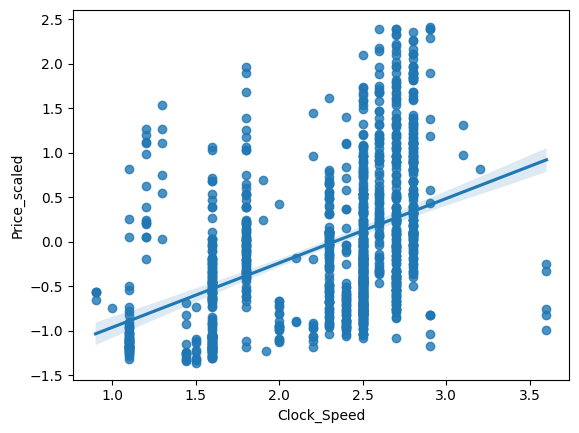

In [96]:
fig_1=sns.regplot(data=dataset,x='Clock_Speed',y='Price_scaled')


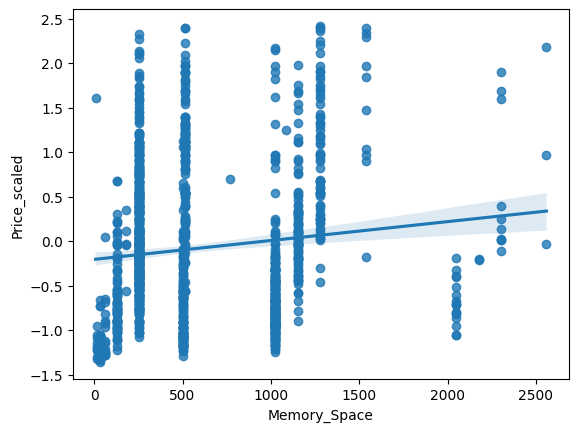

In [97]:
fig_2=sns.regplot(data=dataset,x='Memory_Space',y='Price_scaled')

In [98]:
# GpU Preprocessing Part is yet to be done ...............................
dataset['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'Nvidia GeForce 940MX',
       'Intel HD Graphics 400', 'Nvidia GeForce GTX 1050',
       'AMD Radeon R2', 'AMD Radeon 530', 'Nvidia GeForce 930MX',
       'Intel HD Graphics', 'Intel HD Graphics 500',
       'Nvidia GeForce 930MX ', 'Nvidia GeForce GTX 1060',
       'Nvidia GeForce 150MX', 'Intel Iris Graphics 540',
       'AMD Radeon RX 580', 'Nvidia GeForce 920MX',
       'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvidia GeForce 920M', 'AMD

In [99]:
dataset.head()

,Unnamed: 0,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,Price_scaled,Res_1,Res_2,Screen_Weights,Clock_Speed,Cpu_gen,Memory_Space,SSD_Status
0,0,Apple,Ultrabook,13.3,Intel,8.0,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0.309013,2560,1600,1.92,2.3,5,128,1
1,1,Apple,Ultrabook,13.3,Intel,8.0,Intel HD Graphics 6000,macOS,1.34,47895.5232,-0.321522,1440,900,1.00,1.8,5,128,0
2,2,HP,Notebook,15.6,Intel,8.0,Intel HD Graphics 620,Windows 10,1.86,30636.0000,-0.784950,1920,1080,1.00,2.5,5,256,1
3,3,Apple,Ultrabook,15.4,Intel,16.0,AMD Radeon Pro 455,macOS,1.83,135195.3360,2.022525,2880,1800,1.92,2.7,7,512,1
4,4,Apple,Ultrabook,13.3,Intel,8.0,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0.972681,2560,1600,1.92,3.1,5,256,1


In [100]:
dataset['Gpu_1']=dataset['Gpu'].str.split(expand=True)[0] 
dataset['Gpu_2']=dataset['Gpu'].str.split(expand=True)[1]
dataset['Gpu_3']=dataset['Gpu'].str.split(expand=True)[2]

In [101]:
dataset.head()

,Unnamed: 0,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,...,Res_1,Res_2,Screen_Weights,Clock_Speed,Cpu_gen,Memory_Space,SSD_Status,Gpu_1,Gpu_2,Gpu_3
0,0,Apple,Ultrabook,13.3,Intel,8.0,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,...,2560,1600,1.92,2.3,5,128,1,Intel,Iris,Plus
1,1,Apple,Ultrabook,13.3,Intel,8.0,Intel HD Graphics 6000,macOS,1.34,47895.5232,...,1440,900,1.00,1.8,5,128,0,Intel,HD,Graphics
2,2,HP,Notebook,15.6,Intel,8.0,Intel HD Graphics 620,Windows 10,1.86,30636.0000,...,1920,1080,1.00,2.5,5,256,1,Intel,HD,Graphics
3,3,Apple,Ultrabook,15.4,Intel,16.0,AMD Radeon Pro 455,macOS,1.83,135195.3360,...,2880,1800,1.92,2.7,7,512,1,AMD,Radeon,Pro
4,4,Apple,Ultrabook,13.3,Intel,8.0,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,...,2560,1600,1.92,3.1,5,256,1,Intel,Iris,Plus


In [102]:
dataset['Gpu'] = dataset['Gpu_1'] + ' ' + dataset["Gpu_2"] + ' ' +dataset['Gpu_3']

In [103]:
dataset.head()

,Unnamed: 0,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,...,Res_1,Res_2,Screen_Weights,Clock_Speed,Cpu_gen,Memory_Space,SSD_Status,Gpu_1,Gpu_2,Gpu_3
0,0,Apple,Ultrabook,13.3,Intel,8.0,Intel Iris Plus,macOS,1.37,71378.6832,...,2560,1600,1.92,2.3,5,128,1,Intel,Iris,Plus
1,1,Apple,Ultrabook,13.3,Intel,8.0,Intel HD Graphics,macOS,1.34,47895.5232,...,1440,900,1.00,1.8,5,128,0,Intel,HD,Graphics
2,2,HP,Notebook,15.6,Intel,8.0,Intel HD Graphics,Windows 10,1.86,30636.0000,...,1920,1080,1.00,2.5,5,256,1,Intel,HD,Graphics
3,3,Apple,Ultrabook,15.4,Intel,16.0,AMD Radeon Pro,macOS,1.83,135195.3360,...,2880,1800,1.92,2.7,7,512,1,AMD,Radeon,Pro
4,4,Apple,Ultrabook,13.3,Intel,8.0,Intel Iris Plus,macOS,1.37,96095.8080,...,2560,1600,1.92,3.1,5,256,1,Intel,Iris,Plus


In [104]:
dataset.drop(columns={'Gpu_1','Gpu_2','Gpu_3'},inplace=True)

In [105]:
dataset.head()

,Unnamed: 0,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,Price_scaled,Res_1,Res_2,Screen_Weights,Clock_Speed,Cpu_gen,Memory_Space,SSD_Status
0,0,Apple,Ultrabook,13.3,Intel,8.0,Intel Iris Plus,macOS,1.37,71378.6832,0.309013,2560,1600,1.92,2.3,5,128,1
1,1,Apple,Ultrabook,13.3,Intel,8.0,Intel HD Graphics,macOS,1.34,47895.5232,-0.321522,1440,900,1.00,1.8,5,128,0
2,2,HP,Notebook,15.6,Intel,8.0,Intel HD Graphics,Windows 10,1.86,30636.0000,-0.784950,1920,1080,1.00,2.5,5,256,1
3,3,Apple,Ultrabook,15.4,Intel,16.0,AMD Radeon Pro,macOS,1.83,135195.3360,2.022525,2880,1800,1.92,2.7,7,512,1
4,4,Apple,Ultrabook,13.3,Intel,8.0,Intel Iris Plus,macOS,1.37,96095.8080,0.972681,2560,1600,1.92,3.1,5,256,1


In [106]:
dataset['Gpu'].fillna('Intel HD Graphics',inplace=True)

C:\Users\moin2\AppData\Local\Temp\ipykernel_7128\1275730609.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Gpu'].fillna('Intel HD Graphics',inplace=True)


In [107]:
dataset['Gpu'].unique()

array(['Intel Iris Plus', 'Intel HD Graphics', 'AMD Radeon Pro',
       'AMD Radeon R5', 'Intel Iris Pro', 'Nvidia GeForce MX150',
       'Intel UHD Graphics', 'Nvidia GeForce 940MX', 'Nvidia GeForce GTX',
       'AMD Radeon R2', 'AMD Radeon 530', 'Nvidia GeForce 930MX',
       'Nvidia GeForce 150MX', 'Intel Iris Graphics', 'AMD Radeon RX',
       'Nvidia GeForce 920MX', 'AMD Radeon R4', 'AMD Radeon 520',
       'Nvidia GeForce MX130', 'AMD R4 Graphics', 'Nvidia GeForce 920M',
       'AMD Radeon R7', 'Nvidia GTX 980', 'AMD FirePro W4190M',
       'Nvidia GeForce 930M', 'Nvidia Quadro M1200', 'Nvidia GeForce GT',
       'AMD FirePro W5130M', 'Nvidia Quadro M2200M', 'Nvidia Quadro M620',
       'Nvidia GeForce GTX1050', 'Intel Graphics 620',
       'Nvidia Quadro M520M', 'Nvidia Quadro M2200',
       'Nvidia Quadro M1000M', 'AMD Radeon 540', 'Nvidia Quadro M2000M',
       'Nvidia GeForce GTX1060', 'Nvidia GeForce 920',
       'Nvidia GeForce 940M', 'AMD Radeon R3', 'AMD Radeon R9',
     

In [108]:
dataset=dataset[['Company','TypeName','Inches','Cpu','Ram','Memory_Space','Gpu','OpSys','Weight','Res_1','Res_2','Screen_Weights','Clock_Speed','Cpu_gen','SSD_Status','Price_scaled']]

In [109]:
dataset.columns

Index(['Company', 'TypeName', 'Inches', 'Cpu', 'Ram', 'Memory_Space', 'Gpu',
       'OpSys', 'Weight', 'Res_1', 'Res_2', 'Screen_Weights', 'Clock_Speed',
       'Cpu_gen', 'SSD_Status', 'Price_scaled'],
      dtype='object')

In [110]:
dataset[dataset['Company'].str.contains('Raz')]

,Company,TypeName,Inches,Cpu,Ram,Memory_Space,Gpu,OpSys,Weight,Res_1,Res_2,Screen_Weights,Clock_Speed,Cpu_gen,SSD_Status,Price_scaled
647,Razer,Gaming,14.0,Intel,16.0,256,Nvidia GeForce GTX,Windows 10,1.95,1920,1080,1.00,2.8,7,1,2.110578
816,Razer,Ultrabook,12.5,Intel,16.0,512,Intel HD Graphics,Windows 10,1.29,4,3840,1.31,2.5,7,1,0.966101
1117,Razer,Ultrabook,12.5,Intel,8.0,256,Intel HD Graphics,Windows 10,1.25,4,3840,1.44,2.5,7,1,-0.135459


In [111]:
dataset.head()

,Company,TypeName,Inches,Cpu,Ram,Memory_Space,Gpu,OpSys,Weight,Res_1,Res_2,Screen_Weights,Clock_Speed,Cpu_gen,SSD_Status,Price_scaled
0,Apple,Ultrabook,13.3,Intel,8.0,128,Intel Iris Plus,macOS,1.37,2560,1600,1.92,2.3,5,1,0.309013
1,Apple,Ultrabook,13.3,Intel,8.0,128,Intel HD Graphics,macOS,1.34,1440,900,1.00,1.8,5,0,-0.321522
2,HP,Notebook,15.6,Intel,8.0,256,Intel HD Graphics,Windows 10,1.86,1920,1080,1.00,2.5,5,1,-0.784950
3,Apple,Ultrabook,15.4,Intel,16.0,512,AMD Radeon Pro,macOS,1.83,2880,1800,1.92,2.7,7,1,2.022525
4,Apple,Ultrabook,13.3,Intel,8.0,256,Intel Iris Plus,macOS,1.37,2560,1600,1.92,3.1,5,1,0.972681


In [112]:
dataset.isna().sum()

Company            0
TypeName           0
Inches             0
Cpu                0
Ram                0
Memory_Space       0
Gpu                0
OpSys              0
Weight             0
Res_1              0
Res_2              0
Screen_Weights     0
Clock_Speed       85
Cpu_gen            0
SSD_Status         0
Price_scaled       0
dtype: int64

In [113]:
c_mean=dataset['Clock_Speed'].mean()

In [114]:
dataset['Clock_Speed'].fillna(c_mean,inplace=True)

C:\Users\moin2\AppData\Local\Temp\ipykernel_7128\1336603184.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Clock_Speed'].fillna(c_mean,inplace=True)


In [115]:
dataset.head()

,Company,TypeName,Inches,Cpu,Ram,Memory_Space,Gpu,OpSys,Weight,Res_1,Res_2,Screen_Weights,Clock_Speed,Cpu_gen,SSD_Status,Price_scaled
0,Apple,Ultrabook,13.3,Intel,8.0,128,Intel Iris Plus,macOS,1.37,2560,1600,1.92,2.3,5,1,0.309013
1,Apple,Ultrabook,13.3,Intel,8.0,128,Intel HD Graphics,macOS,1.34,1440,900,1.00,1.8,5,0,-0.321522
2,HP,Notebook,15.6,Intel,8.0,256,Intel HD Graphics,Windows 10,1.86,1920,1080,1.00,2.5,5,1,-0.784950
3,Apple,Ultrabook,15.4,Intel,16.0,512,AMD Radeon Pro,macOS,1.83,2880,1800,1.92,2.7,7,1,2.022525
4,Apple,Ultrabook,13.3,Intel,8.0,256,Intel Iris Plus,macOS,1.37,2560,1600,1.92,3.1,5,1,0.972681


In [116]:
dataset.shape

(1274, 16)

In [117]:
'''                                               step 1 : Defining Source and Target Variables                                                    '''
X=dataset.drop(columns={'Price_scaled'})
y=dataset['Price_scaled']

In [118]:
X.dtypes

Company            object
TypeName           object
Inches            float64
Cpu                object
Ram               float64
Memory_Space        int64
Gpu                object
OpSys              object
Weight            float64
Res_1               int64
Res_2               int64
Screen_Weights    float64
Clock_Speed       float64
Cpu_gen             int64
SSD_Status          int64
dtype: object

In [119]:
y.head(3)

0    0.309013
1   -0.321522
2   -0.784950
Name: Price_scaled, dtype: float64

In [120]:
'''                                            step 2 : Splitting into train test split                                                       '''
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [121]:
'''                                           step 3 : Decising what to do with Numerical and categorical columns                             '''

numerical_cols =['Inches','Ram','Memory_Space','Weight','Res_1','Res_2','Screen_Weights','Clock_Speed',	'Cpu_gen','SSD_Status']
categorical_cols  = ['Company','TypeName','Cpu','Gpu','OpSys']

In [122]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [123]:
# ColumnTransformer for Preprocessing

preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ("scaler", MinMaxScaler(), numerical_cols)
])


In [124]:
# Fit Transform Data

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [125]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [126]:
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.10),
    Dropout(0.05),
    Dense(64),
    LeakyReLU(alpha=0.10),
    Dropout(0.05),
    Dense(32),
    LeakyReLU(alpha=0.10),
    Dense(16),
    LeakyReLU(alpha=0.10),
    Dropout(0.05),
    Dense(8),
    LeakyReLU(alpha=0.10),
    Dropout(0.05),
    Dense(4),
    LeakyReLU(alpha=0.10),
    Dropout(0.05),
    Dense(1, activation='linear')  # Regression output
])
model.summary()

c:\Users\moin2\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\moin2\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        10,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,793 (85.13 KB)

 Trainable params: 21,793 (85.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile Model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mse'])


In [128]:
# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [129]:
# Train Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2000, batch_size=5)


Epoch 1/2000
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7670 - mse: 0.6726 - val_loss: 0.8132 - val_mse: 0.7322
Epoch 2/2000
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7643 - mse: 0.6864 - val_loss: 0.6252 - val_mse: 0.5549
Epoch 3/2000
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5471 - mse: 0.4785 - val_loss: 0.4581 - val_mse: 0.3938
Epoch 4/2000
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4426 - mse: 0.3794 - val_loss: 0.3668 - val_mse: 0.3066
Epoch 5/2000
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3983 - mse: 0.3388 - val_loss: 0.3320 - val_mse: 0.2748
Epoch 6/2000
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3594 - mse: 0.3028 - val_loss: 0.3177 - val_mse: 0.2630
Epoch 7/2000
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3494 - mse: 0.2952 - val_loss: 0.2997 - val_mse: 0.2470
Epoch 8/2000
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3651 - mse: 0.3129 - val_loss: 0.2947 - val_mse: 0.2437
Epoch 9/2000
171/171 ━━━━━━━━━━━━━━━━━━━

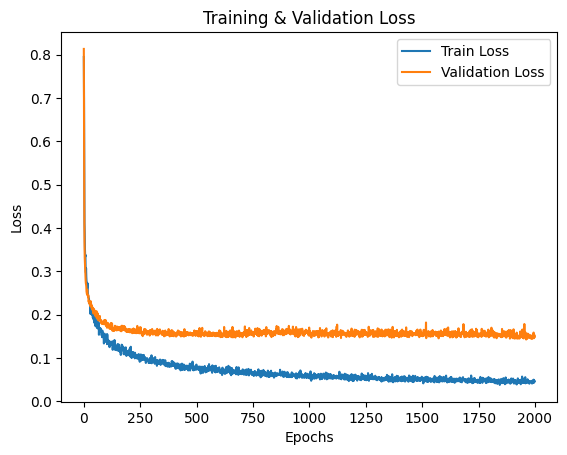

In [130]:
import matplotlib.pyplot as plt
plt.subplot(1, 1, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

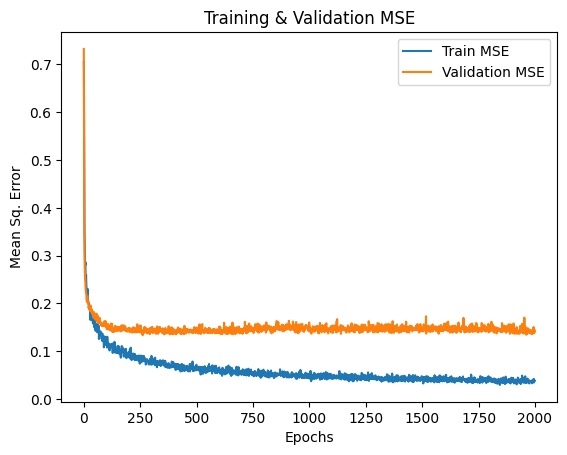

In [131]:
# MAE Curve
plt.subplot(1, 1, 1)
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Sq. Error')
plt.title('Training & Validation MSE')
plt.legend()
    
plt.show()

In [132]:
# Evaluate Model
loss, mae = model.evaluate(X_test, y_test)
accuracy = (1 - mae) * 100  # Convert MAE into a percentage accuracy
print(f"Test MAE: {mae}")
print(f"Model Accuracy: {accuracy:.2f}%")


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1426 - mse: 0.1347 
Test MAE: 0.14132285118103027
Model Accuracy: 85.87%


In [135]:
#                              Further ..... After improving Accuracy More                                    
# Save Model & Preprocessor
model.save("laptop_price_model.h5")
import pickle
pickle.dump(preprocessor, open("preprocessor.pkl", "wb"))

# Predict Function
def predict_price(input_data):
    processed_input = preprocessor.transform(pd.DataFrame([input_data]))
    return model.predict(processed_input)[0][0]


In [138]:
import streamlit as st
import numpy as np
import pandas as pd
import pickle
import tensorflow as tf

# Load Model & Preprocessor
model = tf.keras.models.load_model("laptop_price_model.h5")
preprocessor = pickle.load(open("preprocessor.pkl", "rb"))

# Streamlit UI
st.title("Laptop Price Prediction 💻")

# Define Inputs
companies = ['Apple', 'HP', 'Dell', 'Lenovo', 'Acer', 'Asus']
typenames = ['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible']
cpus = ['Intel', 'AMD']
gpus = ['Intel HD Graphics', 'Nvidia GTX', 'AMD Radeon']
opsys = ['Windows 10', 'macOS', 'Linux']
ssd_status = [0, 1]
cpu_gen = [5, 7, 9]

# Sidebar for User Input
st.sidebar.header("Laptop Specifications")

company = st.sidebar.selectbox("Company", companies)
typename = st.sidebar.selectbox("Type Name", typenames)
cpu = st.sidebar.selectbox("CPU", cpus)
gpu = st.sidebar.selectbox("GPU", gpus)
opsys = st.sidebar.selectbox("Operating System", opsys)
ssd = st.sidebar.selectbox("SSD (1 for Yes, 0 for No)", ssd_status)
cpu_gen_input = st.sidebar.selectbox("CPU Generation", cpu_gen)

inches = st.sidebar.slider("Screen Size (Inches)", 10.0, 20.0, step=0.1)
ram = st.sidebar.slider("RAM (GB)", 2, 64, step=2)
memory_space = st.sidebar.slider("Storage Space (GB)", 128, 2048, step=128)
weight = st.sidebar.slider("Weight (kg)", 0.5, 5.0, step=0.1)
res_1 = st.sidebar.selectbox("Resolution Width", [1366, 1440, 1920, 2560, 2880])
res_2 = st.sidebar.selectbox("Resolution Height", [768, 900, 1080, 1600, 1800])
screen_weight = st.sidebar.slider("Screen Weight", 0.5, 2.0, step=0.1)
clock_speed = st.sidebar.slider("Clock Speed (GHz)", 1.0, 4.0, step=0.1)

# Create DataFrame for Model
input_data = pd.DataFrame([[company, typename, cpu, gpu, opsys, ssd, cpu_gen_input,
                            inches, ram, memory_space, weight, res_1, res_2, screen_weight, clock_speed]],
                          columns=['Company', 'TypeName', 'Cpu', 'Gpu', 'OpSys', 'SSD_Status', 'Cpu_gen',
                                   'Inches', 'Ram', 'Memory_Space', 'Weight', 'Res_1', 'Res_2', 'Screen_Weights', 'Clock_Speed'])

# Preprocess Input
processed_input = preprocessor.transform(input_data)

# Predict Price
if st.sidebar.button("Predict Price"):
    prediction = model.predict(processed_input)[0][0]
    st.subheader(f"Predicted Scaled Price: {prediction:.4f}")



TypeError: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}